In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input\\results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['damage'], axis=1), df['damage'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
%%time
model = RandomForestRegressor(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 32min 19s
Wall time: 6min 9s


<h3>MAPE</h3>

In [6]:
mean_absolute_percentage_error(y_test, pred)

0.013305218640317055

<h3>R2</h3>

In [7]:
r2_score(y_test, pred)

0.9998449993224525

<h3>Cosine Similarity</h3>

In [8]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

0.9999822264700967


<h3>Visualization</h3>

In [9]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

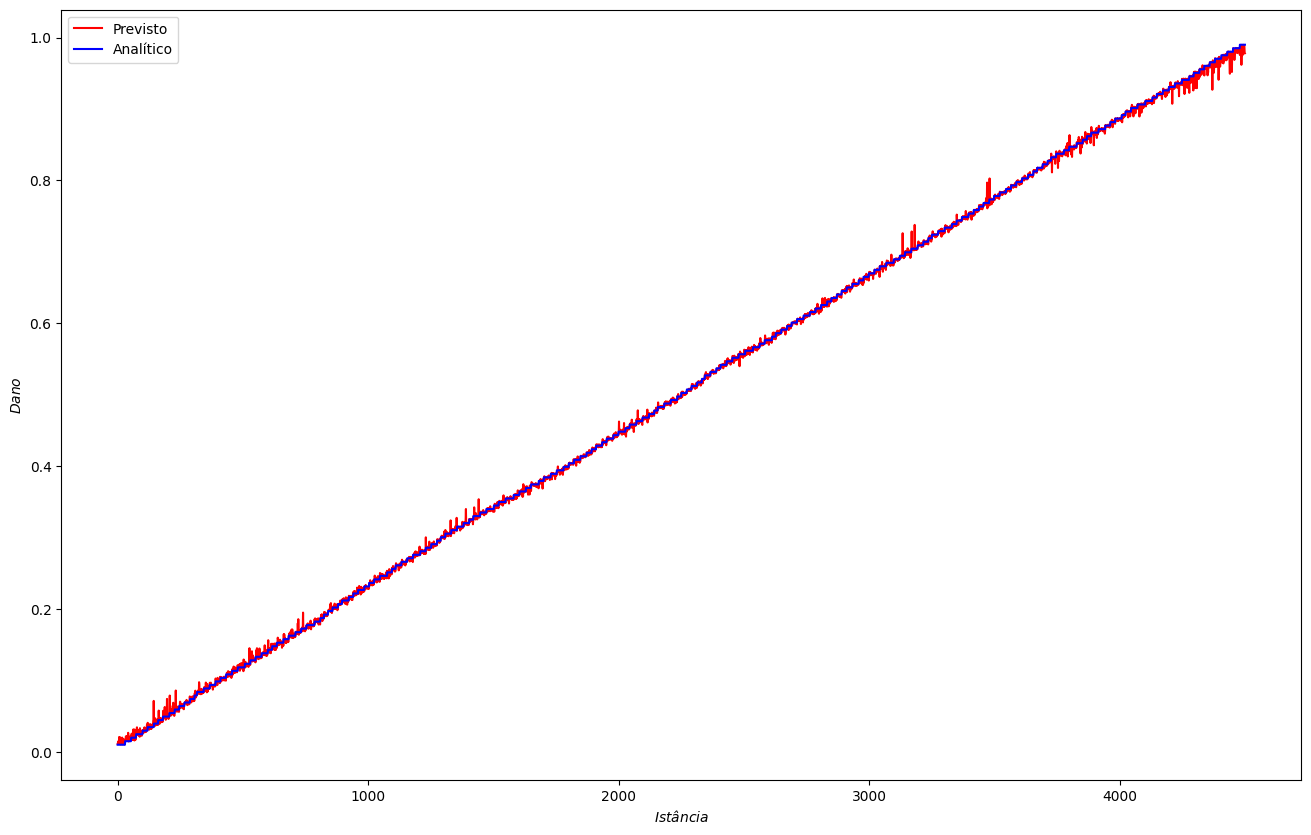

In [10]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Exponential Damage</h1>

In [11]:
df_exp = pd.read_csv('input\\results_complete_exponential.csv')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['damage'], test_size=0.20, random_state=41)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
%%time
model = RandomForestRegressor(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 28min 13s
Wall time: 5min 4s


<h3>MAPE</h3>

In [15]:
mean_absolute_percentage_error(y_test, pred)

0.011820862382443793

<h3>R2</h3>

In [16]:
r2_score(y_test, pred)

0.9997204304981353

<h3>Cosine Similarity</h3>

In [17]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

0.9999809854336047


<h3>Visualization</h3>

In [18]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_exp_reg.csv', index=False)

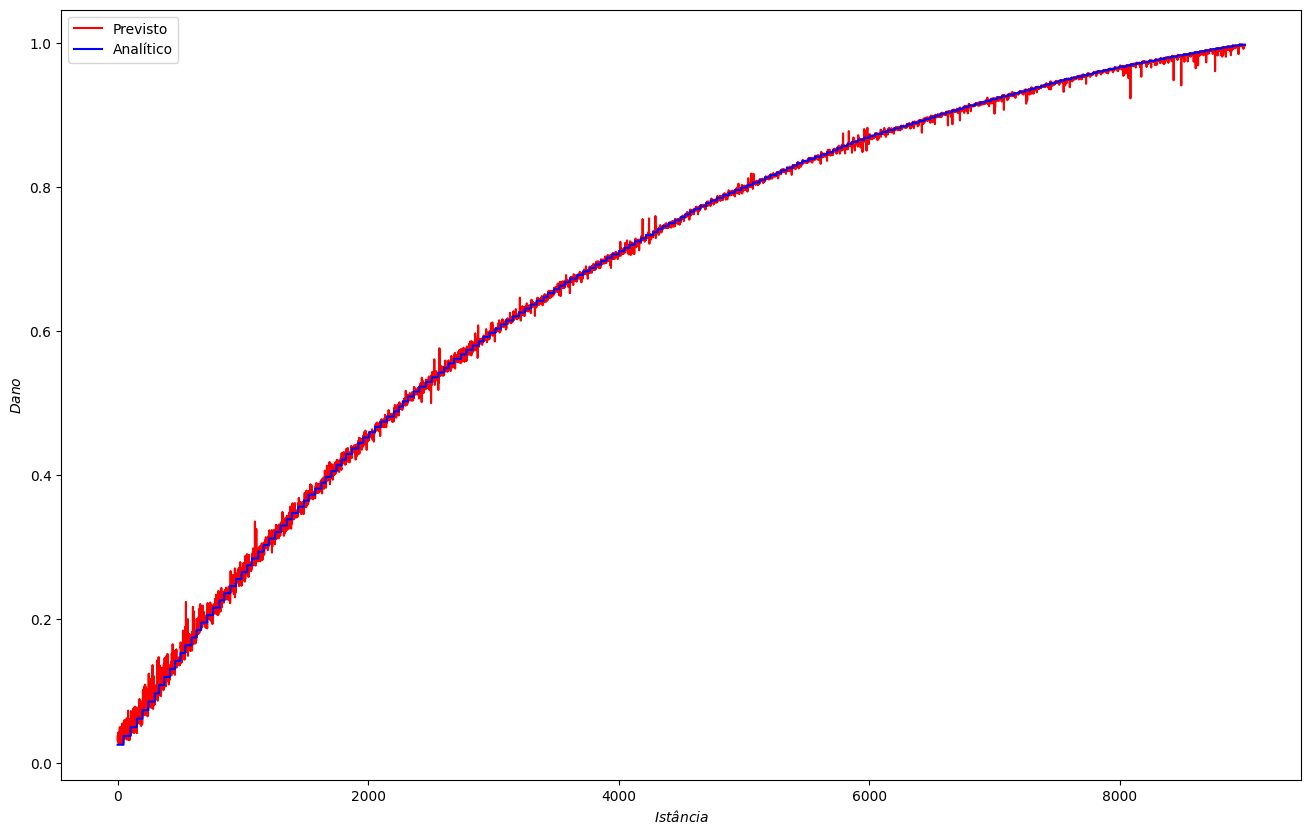

In [19]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Sigmoid-like Damage</h1>

In [20]:
df_sig = pd.read_csv('input\\results_complete_sigmoid_like.csv')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['damage'], test_size=0.20, random_state=41)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
%%time
model = RandomForestRegressor(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

CPU times: total: 30min 27s
Wall time: 5min 26s


<h3>MAPE</h3>

In [24]:
mean_absolute_percentage_error(y_test, pred)

0.029518363916857013

<h3>R2</h3>

In [25]:
r2_score(y_test, pred)

0.999839290917081

<h3>Cosine Similarity</h3>

In [26]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

0.9999717107630585


<h3>Visualization</h3>

In [27]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_sig_reg.csv', index=False)

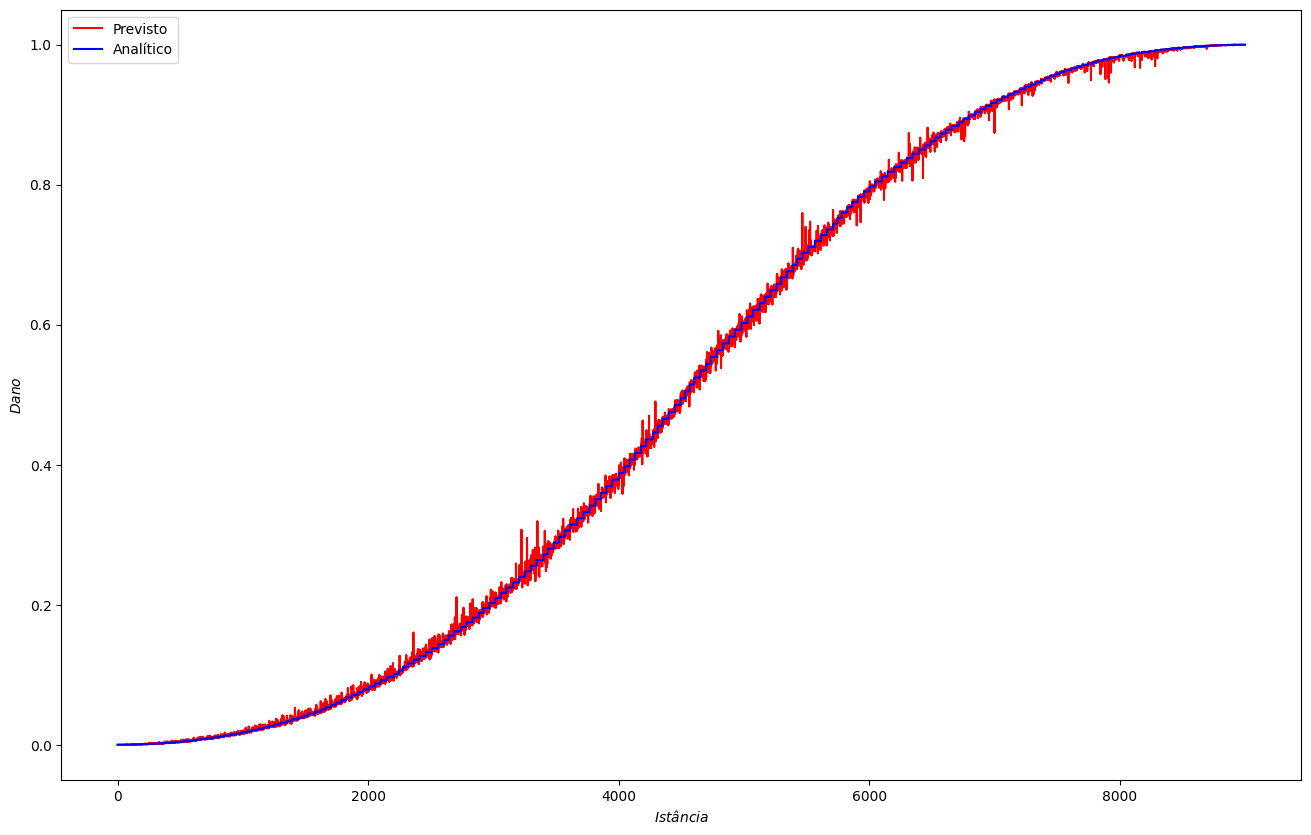

In [28]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()